## Digital Technologies and Data-Driven Business
# Mandatory Assignment 2

In the following, you find tasks that need to be solved as part of the second mandatory assignment in Digital Technologies and Data-driven Business. Once you solved the tasks, please save the .ipynb file (i.e., _File_ >> _Download as_ >> _Notebook (.ipynb)_) and upload the saved file to Canvas. The deadline is __October 21 at 10:00 A.M.__. Mandatory assignments are either __approved__ or __not approved__. If a mandatory assignment is not approved, you will have the opportunity for a retake. 

Please read the instructions carefully and pay particular attention to the following points:
1. Please provide correct Python code (i.e., code that can be executed without errors).
2. Explain the code you have written in your own words (either with markdown or comments).
3. You may work in groups but your submission must be individual, i.e. you each have to provide a functioning .ipynb file with __your own__ solutions and explanations. Do not copy the answers from others. Answers that are not your own (plagiarized) will lead to the mandatory assignment not being approved.
4. If you get stuck, move to the next question – perhaps it will help you solve an earlier one.

Good luck.

## Competitive pricing in the transportation-as-a-service industry

Over the past decade, transportation services such as __Uber__ and __Lyft__ have become an essential part of urban infrastructure for cities across the globe. A great part of their success story has been dynamic pricing. Dynamic pricing is the process by which prices are calculated in real time, based on certain conditions. Users see different prices at different times of day, dynamically adjusted based on driver supply and predictions on traffic, weather and so on. 

After the great performance at Airbnb, you have switched jobs and are now a Senior Data Analyst at __RideDenmark__, a fierce competitor of __Uber__ and __Lyft__, who wants to enter this market. The primary interest of __RideDenmark__ is to get insight into the pricing strategies of __Uber__ and __Lyft__. Your manager, Julie, has a lot of questions and asks you to perform an exploratory data analysis (EDA) to get the answers and insights from the dataset. Most importantly, Julie is interested in which attributes are associated with an increase or decrease in price for a respective ride. 

You have been given a dataset with 7 attributes of rides with  __Uber__ and __Lyft__ throughout a three-week period. Good luck!

## Task 1

## Task 1.1 (1 point)
Install and import the necessary modules and libraries and read the file named `RideDenmark_data.csv`.

In [2]:
#!conda install --yes --prefix {sys.prefix} seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
import seaborn as sns
import datetime 
from sklearn.linear_model import LinearRegression 

print("libraries loaded")

libraries loaded


In [4]:
#Your code goes here
#reading my dataset and seeing the general structure of the data.
df=pd.read_csv("RideDenmark_data.csv")
df.head(5)

,distance,cab_type,time_stamp,destination,origin,price,ride_type
0,0.44,Lyft,1684952607890,North Station,Haymarket Square,5.0,Shared
1,0.44,Lyft,1683284023677,North Station,Haymarket Square,11.0,Lux
2,0.44,Lyft,1683366822198,North Station,Haymarket Square,7.0,Lyft
3,0.44,Lyft,1683553582749,North Station,Haymarket Square,26.0,Lux Black XL
4,0.44,Lyft,1683463360223,North Station,Haymarket Square,9.0,Lyft XL


## Task 1.2 (1 point)

**Julie**: _I was told that there are 50,000 rides listed in the dataset. Is that correct?_

In [5]:
#Your code goes here
#using len to find the amount of rows in the dataset wherein each row should equal a ride
df.__len__()

573426

There are 573426 total instances in the dataset so it is not correct 

**Julie**: _Can you tell me how many of the rides have been conducted by Uber and how many by Lyft?_

In [6]:
#Your code goes here
#Using value count to find the amount of rides conducted by respectively Uber and Lyft
df.value_counts("cab_type")

cab_type
Uber    297027
Lyft    276399
Name: count, dtype: int64

## Task 2

**Julie**: _Next, I want to understand the `time_stamp` variable. To be able to work with it, we first need to convert it to a readable datetime format. Then I want to get an overview of the variable._

In [7]:
#Replace df, if needed, with the variable name that you have assigned to the dataframe

df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='ms')
df['time_stamp'].head()

0   2023-05-24 18:23:27.890
1   2023-05-05 10:53:43.677
2   2023-05-06 09:53:42.198
3   2023-05-08 13:46:22.749
4   2023-05-07 12:42:40.223
Name: time_stamp, dtype: datetime64[ns]

### Task 2.1 (2 points)
**Julie**: _How many rides are there on average per day? Which date had the most booked rides?_

Hint: Use the dt.date function to extract the date from the timestamp.

In [8]:
#Your code goes here
rpd=df['time_stamp'].dt.date.value_counts()
print("The amount of rides per day by date is",rpd)
arpd=rpd.mean()
print("The average rides per day is",arpd)
mrpd=rpd.max()
print("most ride per day is",mrpd, df['time_stamp'].dt.date.max())

The amount of rides per day by date is time_stamp
2023-05-07    66566
2023-05-05    56844
2023-05-06    49550
2023-05-08    37802
2023-05-09    37541
2023-05-26    37285
2023-05-10    37244
2023-05-22    37231
2023-05-24    37219
2023-05-11    37183
2023-05-23    37171
2023-05-25    37168
2023-05-12    22895
2023-05-21    20258
2023-05-04    13103
2023-05-27     4303
2023-05-18     4063
Name: count, dtype: int64
The average rides per day is 33730.94117647059
most ride per day is 66566 2023-05-27


### Task 2.2 (2 points)
**Julie**: _Can you also visualize the number of rides per day over the entire period?_

Axes(0.125,0.11;0.775x0.77)


C:\Users\ravn1\AppData\Local\Temp\ipykernel_35148\2391887567.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(plt.get_xticklabels(), rotation=45)


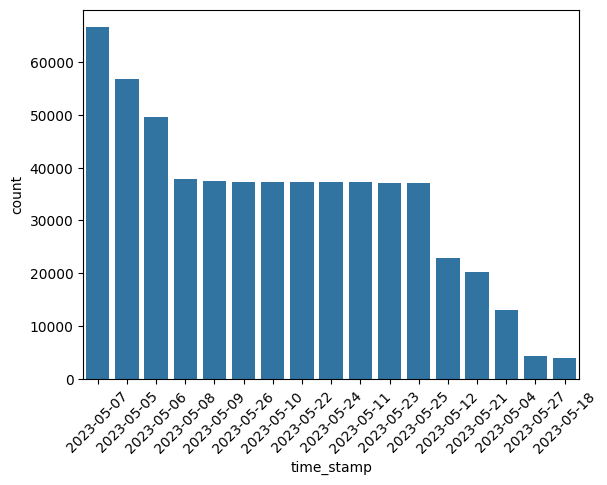

In [9]:
#Your code goes here


plt=sns.barplot(data=rpd,)
plt.set_xticklabels(plt.get_xticklabels(), rotation=45)
print(plt)

### Task 2.3 (2 points)
**Julie**: _I want to understand how the rides are distributed over the day. Can you provide me with a visualization that shows the number of rides per hour and tell me all insights you see please?_

Hint: The pandas function `groupby` will be helpful to group the data by the hour of the day.

C:\Users\ravn1\AppData\Local\Temp\ipykernel_35148\63323891.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pltsrt.set_xticklabels(pltsrt.get_xticklabels(), rotation=45)


Axes(0.125,0.11;0.775x0.77)


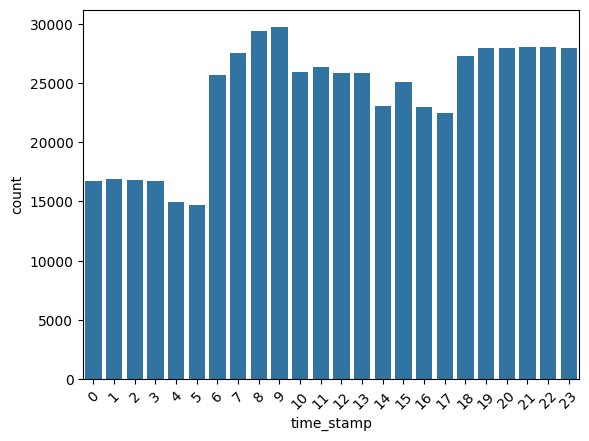

In [10]:
#Your code goes here
rpdsort=df['time_stamp'].dt.hour.value_counts().sort_index()

pltsrt=sns.barplot(data=rpdsort,)
pltsrt.set_xticklabels(pltsrt.get_xticklabels(), rotation=45)
print(pltsrt)

## Task 3

**Julie**: _Next, I want to take a look at the `price` variable._

### Task 3.1 (1 point)

**Julie**: _Please visualize the distribution of `price`._

count    573426.000000
mean         16.543473
std           9.329474
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64
0    7.0
Name: price, dtype: float64


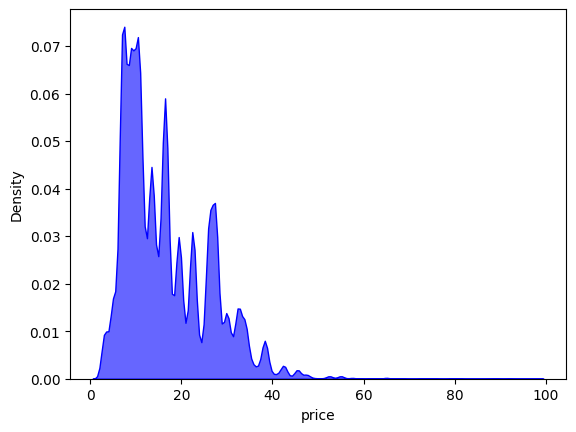

In [11]:
#Your code goes here
dfpr=df['price'].to_frame()
sns.kdeplot(dfpr,x='price', fill=True, color='blue', alpha=0.6)

print(df['price'].describe())
print(df['price'].mode())

### Task 3.2 (1 point)
**Julie**: _Is the distribution skewed and, if yes, positively or negatively? Please help me understand why you think so._

In [12]:
#Your code goes here
skw=df['price'].skew()
print(skw)


1.0485931249171545


The distribution is skewed positively because the mode is lower than the median and mean indicating a positively skewed distribution. also the .skew says so

### Task 3.3 (1 point)
**Julie**: _The visualization is nice but I need to see the numbers.  What interesting things can you tell me about the `price` variable when looking at the basic descriptive statistics?_

Hint: Use your own words (min. 30 words) and create any additional statistics to help your argument if necessary.

In [13]:
#Your code goes here
import math
print(df['price'].describe())
print("the mode is",df['price'].mode())
vari=df['price'].var()
variance=math.sqrt(vari)
print("variance divided by sqrt is",variance)

count    573426.000000
mean         16.543473
std           9.329474
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64
the mode is 0    7.0
Name: price, dtype: float64
variance divided by sqrt is 9.329474387357719


The interesting things about the price variable is the skew which is positive this indicates that there are a couple high value rides that are skewing the bell curve to the expensive side, additionaly the standard deviation is 9.3 which means that most rides cost between 7.22 and 25,86 this helps us to understand the average prices in our distribution


### Task 3.4 (2 points)
**Julie**: _I want to understand the difference of the `price` distribution between Uber and Lyft. How do the quartiles and median differ for `price` between the two companies?_

Hint: Choose a suitable visualization and limit the prices to values below the 95th percentile to be able to make a meaningful comparison. 

count    297027.000000
mean         15.790967
std           8.561788
min           4.500000
25%           9.000000
50%          12.500000
75%          21.500000
max          89.500000
Name: price, dtype: float64
Axes(0.125,0.11;0.775x0.77)


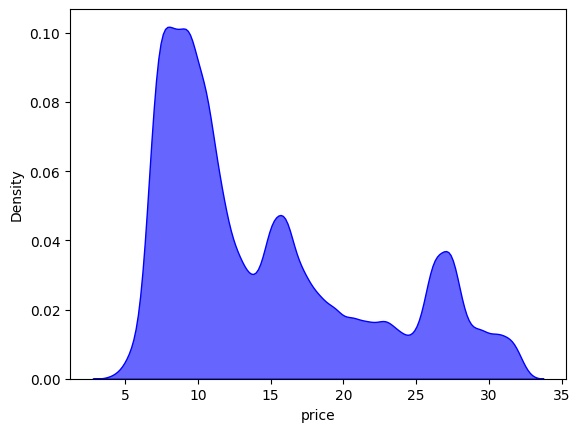

In [14]:
#Your code goes here
dfuber= df[df.cab_type != 'Lyft']
blwq95U=dfuber[dfuber.price < dfuber.price.quantile(.95)]

print(dfuber['price'].describe())
print(sns.kdeplot(blwq95U,x='price', fill=True, color='blue', alpha=0.6))


count    276399.000000
mean         17.352139
std          10.026807
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Density'>

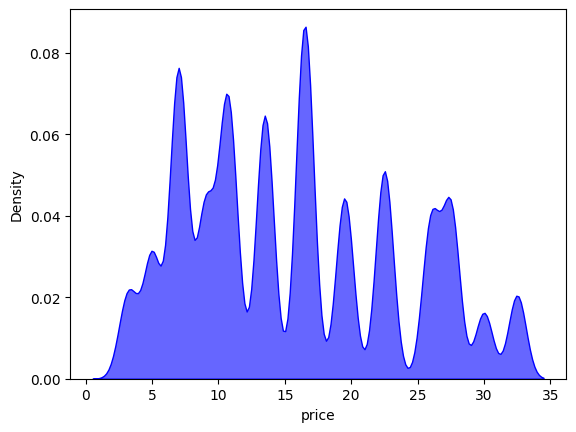

In [15]:
dfLyft= df[df.cab_type != 'Uber']
blwq95L=dfLyft[dfLyft.price < dfLyft.price.quantile(.95)]
print(dfLyft['price'].describe())
sns.kdeplot(blwq95L,x='price', fill=True, color='blue', alpha=0.6)

<Axes: xlabel='price', ylabel='Density'>

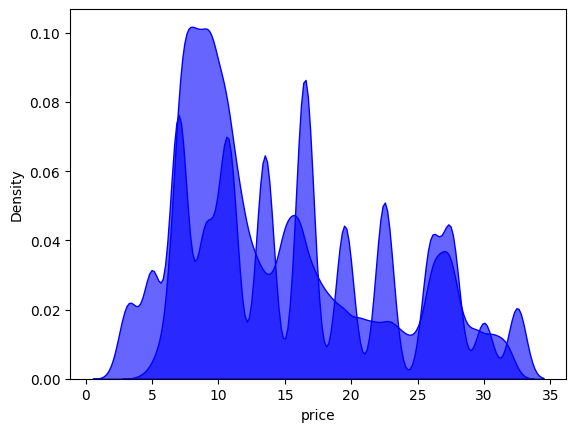

In [16]:
sns.kdeplot(blwq95L,x='price', fill=True, color='blue', alpha=0.6)
sns.kdeplot(blwq95U,x='price', fill=True, color='blue', alpha=0.6)

The largest change in the quartiles is the 50%. The 50% quartile is the only one with a change larger than 1. also the 25th quartile seems to be the exact same despite the minimum and maximum being different between both datasets

## Task 4
**Julie**: _That was a good start and gave us an initial understanding. What I'm really interested in is the relationship between the different attributes and also the two different companies, Uber and Lyft. Let's take a look at that._

### Task 4.1 (1 point)
**Julie**: _Please create a plot that shows the data for Uber and Lyft in different colors and explain what you see in your own words (min. 50 words)._

Hint: The seaborn function `pairplot` will be helpful here.
    

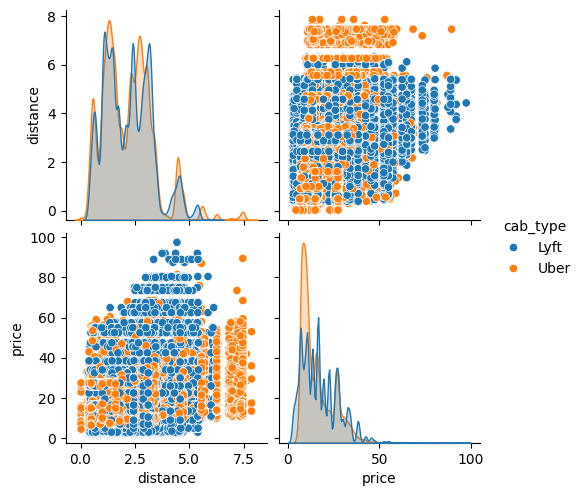

In [17]:
#Your code goes here
sns.pairplot(data=df, hue='cab_type')


from what i can see it seems that the people who ride Uber ride further and pay less than a person who uses Lyft in that same way it appears that uber users on average travel shorter distances and pay less when traveling longer distances indicating that lyft charges more, and that uber is a cheaper option if traveling short distances

### Task 4.2 (1 point)
**Julie**: _Hmm, it looks like the pairplot only shows the relationship between numeric variables but not categorical ones in our dataset. I really want to find out what relationship there is between the `ride_type` and `price`. Please generate a categorical scatterplot that has `ride_type` on the x-axis and `price` on the y-axis._

Hint: Use different colors again to distinguishe between Uber and Lyft for a nicer visualisation. Also distinguishe between different `ride_type`. The function `catplot` within seaborn could be a good try.

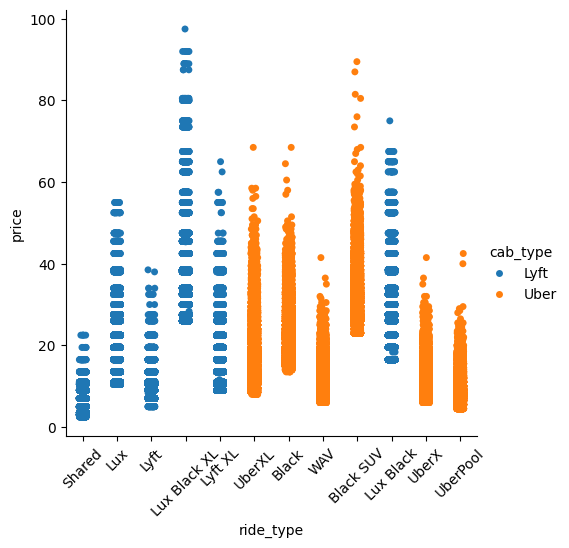

In [18]:
#Your code goes here
cpl=sns.catplot(data=df, x='ride_type', y='price', hue='cab_type')
cpl.set_xticklabels(rotation=45)
print(cpl)


### Task 4.3 (1 point)
**Julie**: _What can you tell me from the data? What is your impression of the relationships between different variables after both the pairplot and catplot?_

The result of the catplot seems to explain the difference between the distance/price pairplot by showing that there is a single ride type offered by Lyft that seems to be "skewing" the data resulting in outliers on our scatterplots and density plots. Outside of this it seems that the people Who share using Lyft enjoy lower prices than the ones using UberPool.

## Task 5

### Task 5.1 (1 point)
**Julie**: _While the analysis of the attribute `price` offers interesting findings, we want to find out what these absolute amounts look like in proportion to `distance`. Please create a new column representing the `price` per km (`distance`) payed for the individual rides._


In [19]:
# Your code goes here
df['perkm']=df['price']/df['distance']

df['perkm'].head(5)

0    11.363636
1    25.000000
2    15.909091
3    59.090909
4    20.454545
Name: perkm, dtype: float64

### Task 5.2 (1 point)
**Julie**: I have a few specific questions: 
1. What is the average for `price/km`? 
2. What is the range of the `price/km`?

In [26]:
#Your code goes here
print('the mean is',df['perkm'].mean())

the mean is 9.686253881853045


In [21]:
# Your code goes here
max=df['perkm'].max()
min=df['perkm'].min()

print('the range is',max-min)

the range is 1374.443413729128


### Task 5.3 (1 point)
**Julie**: Please plot the average price per km through out the day.

<Axes: xlabel='hour'>

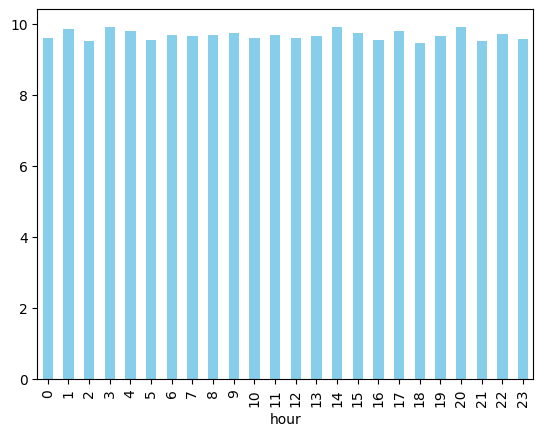

In [22]:
#Your code goes here
Rpdsort=rpdsort.to_frame()

# Extract the hour from the timestamp
df['hour'] = df['time_stamp'].dt.hour

# Calculate the average price per distance for each hour
df['price_per_distance'] = df['price'] / df['distance']
avg_price_per_distance = df.groupby('hour')['price_per_distance'].mean()

avg_price_per_distance.plot(kind='bar', color='skyblue')

## Task 6 (2 points)
**Julie**: _I heard that most customers book the UberXL or Lux Black XL. Is that true?_

Hint: Use an appropriate visualization to verify this assumption.

ride_type
Lyft XL         45980
Lux Black       46029
Lyft            46054
Lux             46106
Lux Black XL    46106
Shared          46124
Black           49401
UberX           49452
UberXL          49477
UberPool        49550
Black SUV       49563
WAV             49584
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


C:\Users\ravn1\AppData\Local\Temp\ipykernel_35148\3004882743.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(plt.get_xticklabels(), rotation=45)


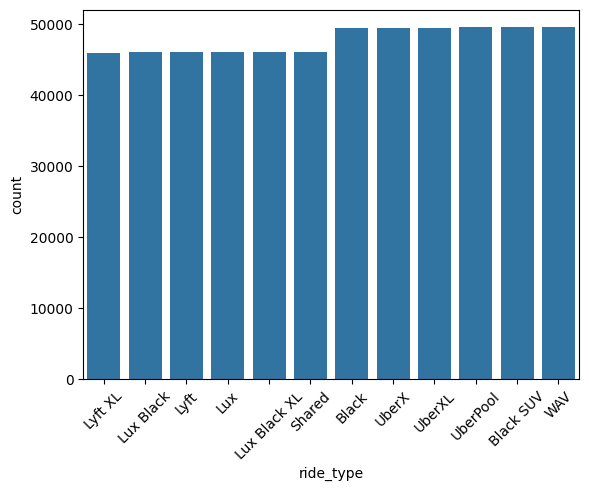

In [23]:
#Your code goes here
ridechoice=df['ride_type'].value_counts().sort_values()

print(ridechoice)

plt=sns.barplot(data=ridechoice,)
plt.set_xticklabels(plt.get_xticklabels(), rotation=45)
print(plt)

It seems to be Black SUV or WAV that is the most booked 

## Task 7 (2 points)
**Julie**: _Has Uber or Lyft made more revenue in the timeframe of the dataset? Please tell me what you find out._

In [24]:
#Your code goes here
#seperating Uber and Lyft Cab types 
lyft = df[df['cab_type'] == 'Lyft']
Uber = df[df['cab_type'] == 'Uber']
# Calculate the total money Lyft and Uber made
total_lyft_revenue = lyft['price'].sum()
total_Uber_revenue = Uber['price'].sum()

print('The total revenue made by Lyft is',total_lyft_revenue, 'the total revenue made by Uber is',total_Uber_revenue)

The total revenue made by Lyft is 4796113.9799999995 the total revenue made by Uber is 4690343.5


It appear that Lyft has made more revenue during this period.

## Task 8 (2 points)
**Julie**: _My last assumption is that there could be a difference in the location and price. I would like to know from which origin customers take the journeys with the highest prices on average in order to position drivers strategically in these locations._ 

_Can you please visualize those two variables in a suitable plot? Please also provide me a detailed report of your observations (min. 100 words)_


<Axes: xlabel='origin'>

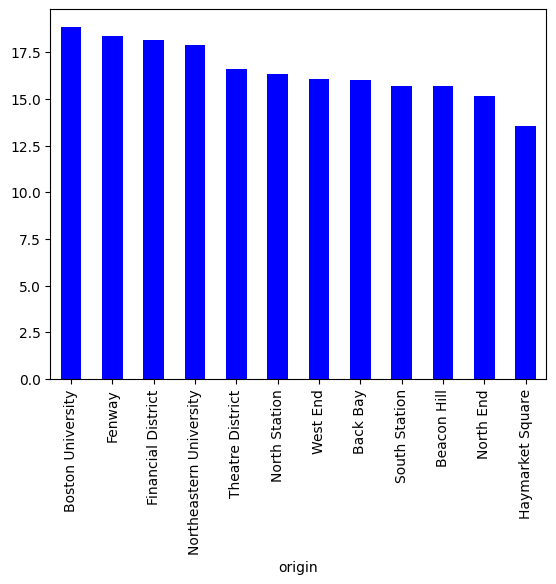

In [25]:
#Your code goes here
# Grouping by origin then calculating the average price for each location
priceorigin = df.groupby('origin')['price'].mean().sort_values(ascending=False)

# Visualizing the average price per origin using a bar plot

priceorigin.plot(kind='bar', color='blue')


Institutions and districts seem to be getting the highest average price which could indicate Users with more disposable income or that drivers charge more due to traffic conditions. This would suggest that having drivers on hand in these districts could result in a higher average earning. 